In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

from get_kr import get_kr

In [2]:
A = np.array([[0, 1],
              [0, -1]])

B = np.array([[0],
              [10]])

C = np.array([1, 0])

D = 0

In [3]:
sys_ss = ctrl.ss(A, B, C, D)
sys_ss

StateSpace(array([[ 0.,  1.],
       [ 0., -1.]]), array([[ 0.],
       [10.]]), array([[1., 0.]]), array([[0.]]))

In [4]:
# 1. Eigenvalores del sistema
print("Eigenvalores lazo abierto: ", np.linalg.eigvals(A))

Eigenvalores lazo abierto:  [ 0. -1.]


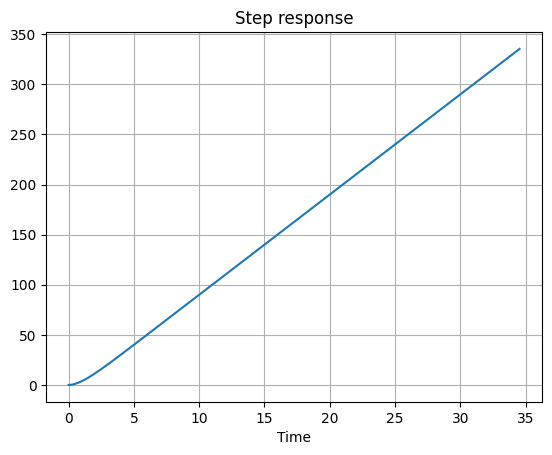

In [5]:
# 2. Respuesta ante una entrada de tipo escalon
t, yout = ctrl.step_response(sys_ss)

plt.figure()
plt.plot(t, yout)
plt.title('Step response')
plt.xlabel('Time')
plt.grid('minor')
plt.show()

In [6]:
# 3. Verificamos si el sistema es controlable
U = ctrl.ctrb(A, B)

if np.linalg.det(U) != 0:
    print("Sistema controlable")

    # 4. Sistema en lazo cerrado
    sys_ss_cl = ctrl.feedback(sys1 = sys_ss, sys2 = 1, sign = -1)
    sys_ss_cl

    # 5. Eigenvalores del sistema en lazo cerrado
    print("Eigenvalores lazo cerrado: ", np.linalg.eigvals(sys_ss_cl.A))
else:
    print("Sistema no controlable")

Sistema controlable
Eigenvalores lazo cerrado:  [-0.5+3.122499j -0.5-3.122499j]


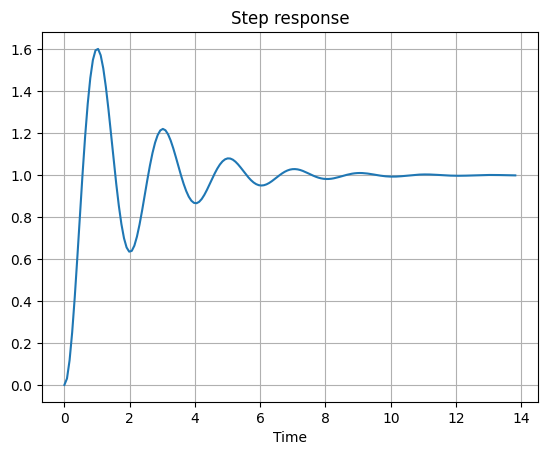

In [7]:
# 6. Respuesta ante una entrada de tipo escalon
t_cl, yout_cl = ctrl.step_response(sys_ss_cl)

plt.figure()
plt.plot(t_cl, yout_cl)
plt.title('Step response')
plt.xlabel('Time')
plt.grid('minor')
plt.show()

In [8]:
# 7. Analisis de la respuesta del sistema en lazo cerrado
ctrl.step_info(sys_ss_cl)

{'RiseTime': np.float64(0.3969974298265596),
 'SettlingTime': np.float64(7.38415219477401),
 'SettlingMin': np.float64(0.6357315859938113),
 'SettlingMax': np.float64(1.6026418084698082),
 'Overshoot': np.float64(60.26418084698082),
 'Undershoot': 0,
 'Peak': np.float64(1.6026418084698082),
 'PeakTime': np.float64(1.0321933175490552),
 'SteadyStateValue': np.float64(1.0)}

In [13]:
# 8. Eigenvalores deseados
eig_d = np.array([-2 + 2j, -2 - 2j])

K = ctrl.place(A, B, eig_d)
print("K: ", K)

# 9. Sistema en lazo cerrado con retroalimentacion K
kr = get_kr(sys_ss, K)
print("kr: ", kr)

Acl = A - B*K
Bcl = kr*B

sys_ss_cl_K = ctrl.ss(Acl, Bcl, C, D)
sys_ss_cl_K

# 10. Eigenvalores deseados
print("Eigenvalores deseados (lazo cerrado): ", np.linalg.eigvals(Acl))

K:  [[0.8 0.3]]
kr:  [[0.8]]
Eigenvalores deseados (lazo cerrado):  [-0.5+2.78388218j -0.5-2.78388218j]


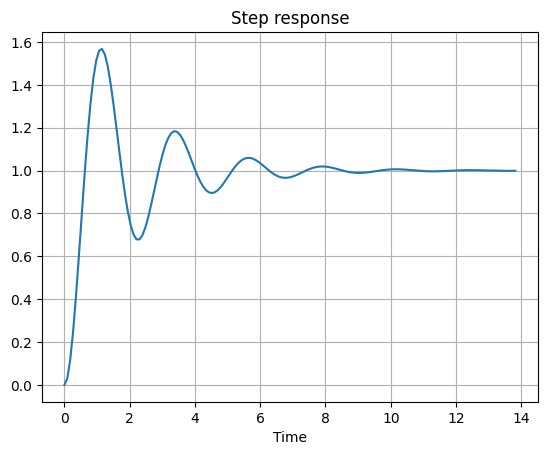

In [10]:
# 11. Respuesta ante una entrada de tipo escalon
t_cl_K, yout_cl_K = ctrl.step_response(sys_ss_cl_K)

plt.figure()
plt.plot(t_cl_K, yout_cl_K)
plt.title('Step response')
plt.xlabel('Time')
plt.grid('minor')
plt.show()

In [11]:
# 12. Analisis de la respuesta del sistema en lazo cerrado
ctrl.step_info(sys_ss_cl_K)

{'RiseTime': np.float64(0.44280482557577805),
 'SettlingTime': np.float64(7.173438174327605),
 'SettlingMin': np.float64(0.6788998844299761),
 'SettlingMax': np.float64(1.5676151699757086),
 'Overshoot': np.float64(56.76151699757086),
 'Undershoot': 0,
 'Peak': np.float64(1.5676151699757086),
 'PeakTime': np.float64(1.151292546497023),
 'SteadyStateValue': np.float64(1.0)}